In [4]:
import networkx as nx
import pandas as pd
import numpy as np
import random 
import scipy.stats as stats
import matplotlib.pyplot as plt
import sys, os
import warnings
import processing_module as pm
import scipy.stats as stats

warnings.filterwarnings("ignore")

In [5]:
my_path = os.path.abspath("") + "/.."
data = pd.read_csv(my_path + "/Data_initial" + '/fb-messages.edges', delimiter=',')

In [6]:
data.rename(columns = {'730':'Source', '730.1':'Target', '1080090715.0':'Time_start'}, inplace = True )

In [7]:
print(data)

       Source  Target    Time_start
0         563     563  1.080091e+09
1         674     674  1.080718e+09
2         571     571  1.081366e+09
3         667     667  1.082013e+09
4         563     667  1.082034e+09
...       ...     ...           ...
61728    1382     979  1.098769e+09
61729    1382    1322  1.098770e+09
61730    1382      28  1.098770e+09
61731    1098      67  1.098770e+09
61732    1098      67  1.098770e+09

[61733 rows x 3 columns]


<span style="color:orange">
    
## Исследование распределения связей ##

<span style="color:orange">
Задание графа на данных без времени (статический граф).
И вычисление PageRank

In [8]:
data_1 = data.copy()
data_1.drop(['Time_start'], axis= 1 , inplace= True)
data_list = data_1.values.tolist()

G = nx.Graph()
G.add_edges_from(data_list)
G.remove_edges_from(nx.selfloop_edges(G))

pr = nx.pagerank(G, alpha=0.9)

In [9]:
X = list(pr.values())

Xord = np.sort(X, axis=0)
MaxN = len(X)

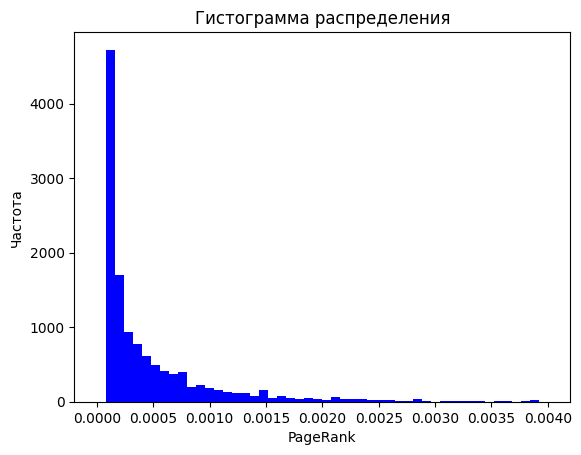

In [10]:
plt.hist(X, bins = 50, range = (0, 0.004), color = 'blue', density=True)
plt.xlabel('PageRank')
plt.ylabel('Частота')
plt.title("Гистограмма распределения")
plt.savefig(my_path + "/Text" + '/Imagines' + '/PR_hist')
plt.show()

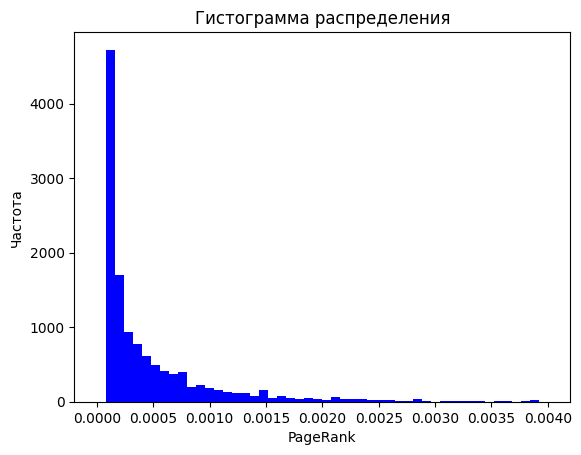

In [11]:
plt.hist(X, bins = 50, range = (0, 0.004), color = 'blue', density=True)
plt.xlabel('PageRank')
plt.ylabel('Частота')
plt.title("Гистограмма распределения")
plt.show()

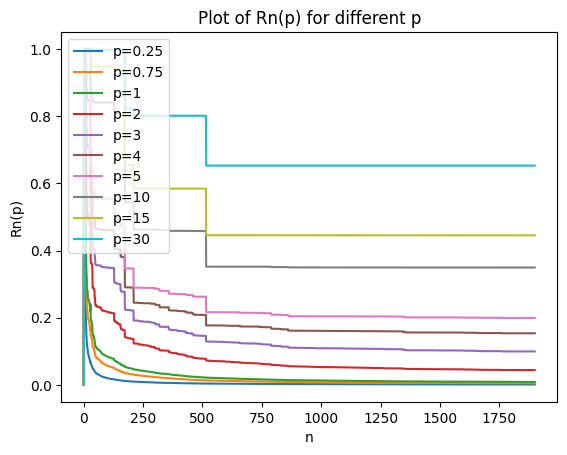

In [12]:
#2 exersice

arrP = [0.25, 0.75,1, 2, 3, 4, 5, 10, 15, 30] #задание диапозона на p
MaxP = len(arrP)
n = 0 
p = 0 
modX = np.zeros((MaxN, MaxP))
Rn = np.zeros((MaxN, MaxP))


for p in range(0, MaxP):
    modX[:, p] = np.power(np.abs(X), arrP[p])
    Mn = 0
    Sn = 0
    for n in range(1, MaxN): 
        Mn = np.max(modX[0:n, p])
        Sn = np.sum(modX[0:n, p])
        Rn[n][p] = Mn / Sn


pltN = np.arange(1, MaxN+1, 1)
legend = []

for p in range(0, MaxP):
    plt.plot(pltN, Rn[:, p])
    legend.append(f"p={arrP[p]}")
    
plt.legend(legend, loc="upper left")
plt.xlabel('n') #Подпись для оси х
plt.ylabel('Rn(p)') #Подпись для оси y
plt.title('Plot of Rn(p) for different p') #Название
plt.savefig(my_path + "/Text" + '/Imagines' + '/Rn')
plt.show()



#Не понятно как сделать выводы о моментах 

<span style="color:orange">

По итогам исследования можно сказать, 
Для $p \in \lbrace 0.25, 0.75, 1 \rbrace $ $R_{n}(p)$ по всей видимости стремиться к нулю при возрастании n.
Для $p \in \lbrace 2, 3, 4, 5, 10, 15, 30 \rbrace $ $ Rn(p)$ по всей видимости стремиться к положительной константе при возрастании n.

Вывод: $E|X|^{p} < \infty$ для $p \leqslant 1$ только, $E|X|^{p} = \infty$ для $p > 1$.


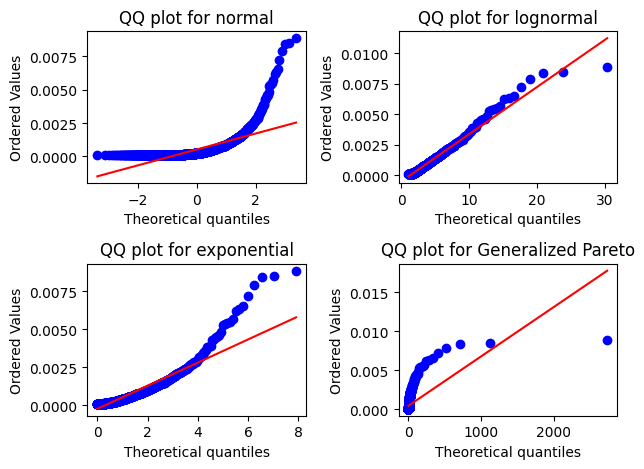

In [13]:
#3 exersice

fig, axs = plt.subplots(2, 2)

stats.probplot(Xord, dist="norm", plot=axs[0, 0])
axs[0, 0].set_title('QQ plot for normal') #Название

stats.probplot(Xord, dist=stats.lognorm(1,1), plot=axs[0, 1])
axs[0, 1].set_title('QQ plot for lognormal') #Название

stats.probplot(Xord, dist=stats.expon, plot=axs[1, 0])
axs[1, 0].set_title('QQ plot for exponential') #Название

stats.probplot(Xord, dist=stats.genpareto(1), plot=axs[1, 1])
axs[1, 1].set_title('QQ plot for Generalized Pareto') #Название

fig.tight_layout()
plt.savefig(my_path + "/Text" + '/Imagines' + '/QQ')

<span style="color:orange">

Постановка задачи:
Построить QQ-plot для упорядоченных данных для распределений: нормального, логнормального, экспоненциального и Парето общего.

На графиках представлен QQ-plot, где красная линия $y=x$
Вывод: логнормальное распределение относительно подходит под выборку.

In [14]:
#4 exersice
#print(X)

# U = np.arange(0, 0.1, 0.0001)
# En = np.zeros(len(U))
# SumUp = 0
# SumDn = 0

# for u in range (0, len(U)):
#     SumUp = 0
#     SumDn = 0
#     for i in range (0, len(X)):
#         if (X[i] > U[u]):
#             SumUp += X[i]
#             SumDn += 1
#     En[u] = SumUp / SumDn


# pltN = np.arange(1, MaxN+1, 1)
# legend = []

# plt.plot(U, En)
# plt.xlabel('u') #Подпись для оси х
# plt.ylabel('En(u)') #Подпись для оси y
# plt.title('Plot of En(u)') #Название
# plt.show()


In [15]:
def plot_est(Data, label='Data'):
    legend = []
    n = len(Data)
    
    y, k_find = pm.eye_ball(Data)
    
    plt.plot(np.arange(1, len(Data)+1), Data)
    plt.axhline(y, color = 'r', linestyle = '-')
    
    print(y)
    plt.ylim(np.min(Data[int(n/10):]), np.max(Data[:int(n*0.9)]))
    
    plt.xlabel('k') #Подпись для оси х
    plt.ylabel(label + '(k)') #Подпись для оси y
    plt.title(label) #Название
    legend.append(label)
    legend.append(f"{label} stability={y}")
    plt.legend(legend, loc="upper left")
    
    # plt.savefig(my_path + "/Text" + '/Imagines' + '/' + label)
    plt.show()

In [16]:
GammaH = pm.hill(X)
REst = pm.ratio_estimator(X)
GammaM_data = pm.moment_estimator(X)
GammaUH = pm.uh_estimator(X)
GammaP = pm.pickands_estimator(X)
num_gamma = pm.mixed_moment(X)

0.6349504442653409


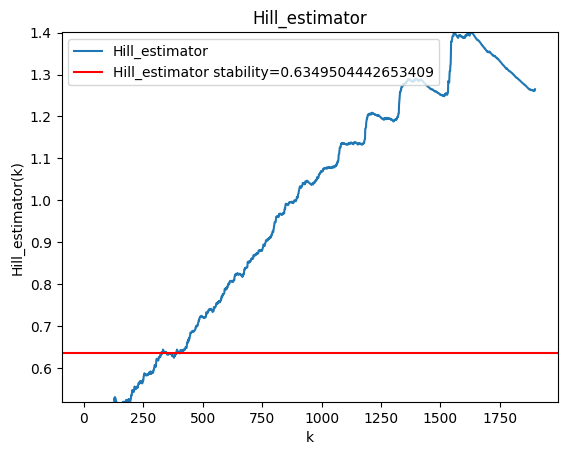

0.4431575422817525


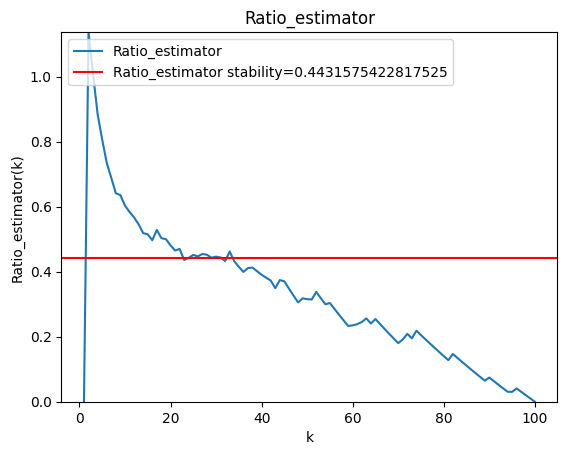

0.42796619033157146


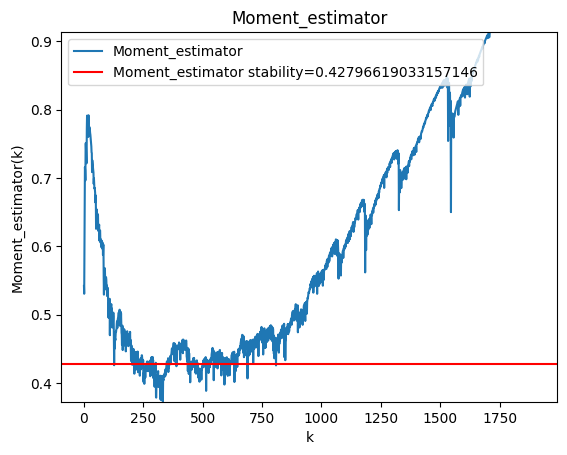

0.4290698084981077


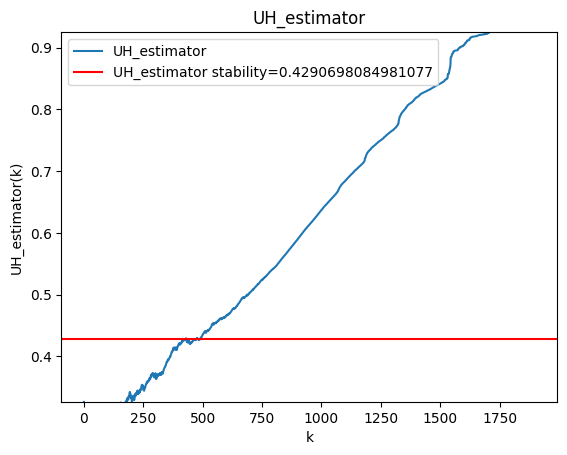

0.42408544829232964


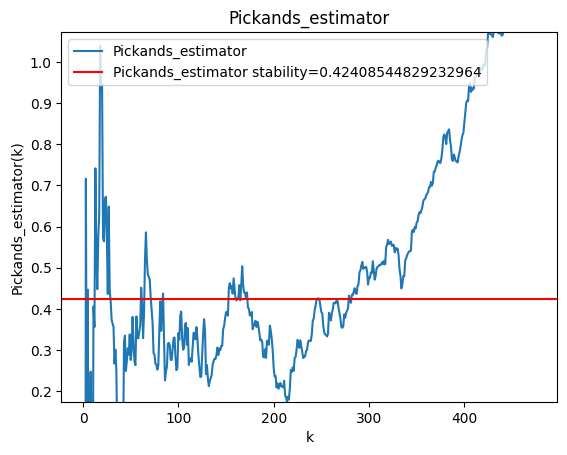

0.17902196033215148


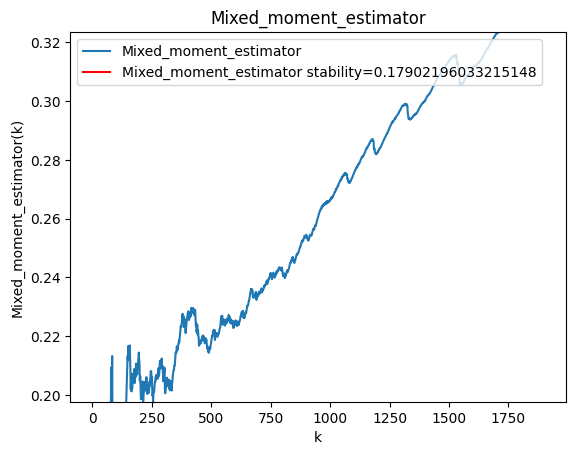

In [17]:
plot_est(GammaH, label='Hill_estimator')
plot_est(REst, label='Ratio_estimator')
plot_est(GammaM_data, label='Moment_estimator')
plot_est(GammaUH, label='UH_estimator')
plot_est(GammaP, label='Pickands_estimator')
plot_est(num_gamma, label='Mixed_moment_estimator')

In [19]:
def plot_est_bs(val_mean, val_dn, val_up, label='Data'):
    B=100
    legend = []
    plt.plot(val_up)
    legend.append("Верхняя грань доверительного интервала")
    plt.plot(val_dn)
    legend.append("Нижняя грань доверительного интервала")
    plt.plot(val_mean)
    legend.append("Hill's plot")
    plt.ylim(0, 2)
    plt.legend(legend, loc="upper left")
    plt.xlabel('k') #Подпись для оси х
    plt.ylabel('Estimator') #Подпись для оси y
    plt.title(f"Estimator с доверительным интервалом при B = {B} и P = {interval} ") #Название
    plt.show()

In [20]:
interval = 0.9
val_mean, val_dn, val_up = pm.bootstrap_est(X, interval, func=pm.hill)

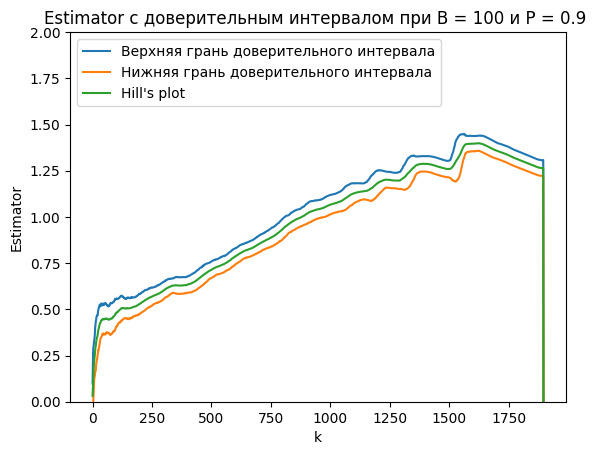

In [21]:
plot_est_bs(val_mean, val_dn, val_up, label='Data')

<span style="color:orange">

Оценку хвостового индекса сделать затруднительно.

<span style="color:orange">
    
## Разбиение на сообщества ##

In [22]:
my_path = os.path.abspath("") + "/.."
data = pd.read_csv(my_path + "/Data_initial" + '/fb-messages.edges', delimiter=',')
data.rename(columns = {'730':'Source', '730.1':'Target', '1080090715.0':'Time_start'} \
           , inplace = True )

In [23]:
comm = nx.community.louvain_communities(G, seed=123)

In [24]:
for i in range(len(comm)):
    print(i, len(comm[i]))

0 125
1 2
2 236
3 367
4 122
5 41
6 331
7 248
8 29
9 287
10 107
11 2
12 2


In [23]:
#data_com_1 = data_1.loc[((data_1['Source']) == any(comm[1]))]
data_com_1 = data_1[data_1['Source'].isin(comm[0])]
print(data_com_1)

       Source  Target
1         674     674
2         571     571
9        1859    1859
10       1487    1487
15       1792    1792
...       ...     ...
61605    1270    1663
61653     818     278
61654     818    1462
61656     818    1462
61658     818    1462

[2241 rows x 2 columns]


In [24]:
data_list_1 = data_com_1.values.tolist()
G1 = nx.Graph()
G1.add_edges_from(data_list_1)
G1.remove_edges_from(nx.selfloop_edges(G1))

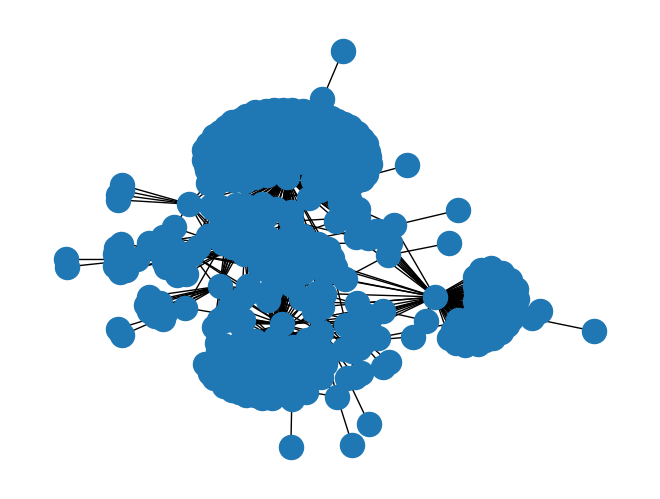

In [25]:
nx.draw(G1)

In [26]:
data_com_2 = data_1[data_1['Source'].isin(comm[2])]
data_list_2 = data_com_2.values.tolist()
G2 = nx.Graph()
G2.add_edges_from(data_list_2)
G2.remove_edges_from(nx.selfloop_edges(G2))

In [27]:
(nx.to_pandas_edgelist(G1)).to_csv(my_path + "/Data_postproc" + '/Comm1.csv', encoding='utf-8', \
              date_format="%Y-%m-%d-%H-%M-%S", index=False)
(nx.to_pandas_edgelist(G2)).to_csv(my_path + "/Data_postproc" + '/Comm2.csv', encoding='utf-8', \
              date_format="%Y-%m-%d-%H-%M-%S", index=False)

In [28]:
data_com_3 = data[data['Source'].isin(comm[3])]
print(data_com_3)


       Source  Target    Time_start
8        1889    1889  1.082395e+09
11       1489    1489  1.082401e+09
22        679     679  1.082415e+09
36        941     941  1.082425e+09
38       1864    1864  1.082426e+09
...       ...     ...           ...
61676    1811      74  1.098669e+09
61677    1811      43  1.098669e+09
61693    1811    1478  1.098714e+09
61703    1256       7  1.098763e+09
61704    1256    1344  1.098763e+09

[9596 rows x 3 columns]


In [29]:
data_list_t = data_com_3[['Source', 'Target']].values.tolist()
G1 = nx.Graph()
G1.add_edges_from(data_list_t)
G1.remove_edges_from(nx.selfloop_edges(G1))
#        print(nx.number_of_nodes(G1))
        
pr_t = nx.pagerank(G1, alpha=0.9)
#        print(pr_t)
        
df_pr_t = pd.DataFrame(list(pr_t.items()), columns=['Node', 'PageRank'])

#        print(df_pr_t.size)
df_pr_t_1 = df_pr_t.loc[df_pr_t['Node'].isin(comm[3])]

In [30]:
X1 = list(df_pr_t_1['PageRank'])

In [32]:
GammaH = pm.hill(X1)
REst = pm.ratio_estimator(X1)
GammaM_data = pm.moment_estimator(X1)
GammaUH = pm.uh_estimator(X1)
#GammaP = Pickands_estimator(X)
num_gamma = pm.mixed_moment(X1)

0.9260930024036655


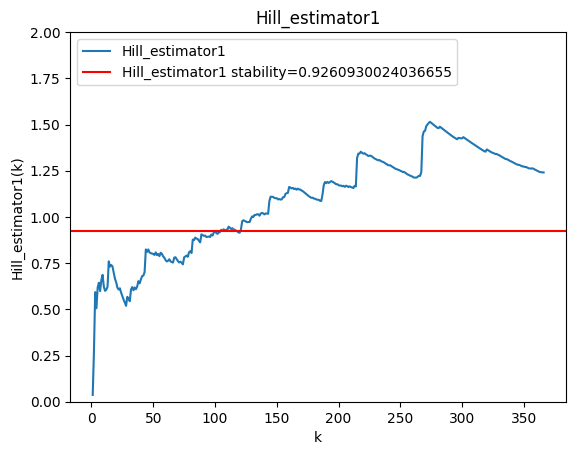

0.6192347583277182


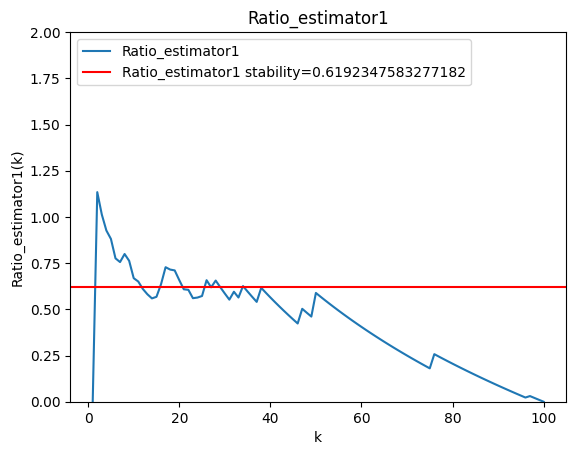

0.6817680950419336


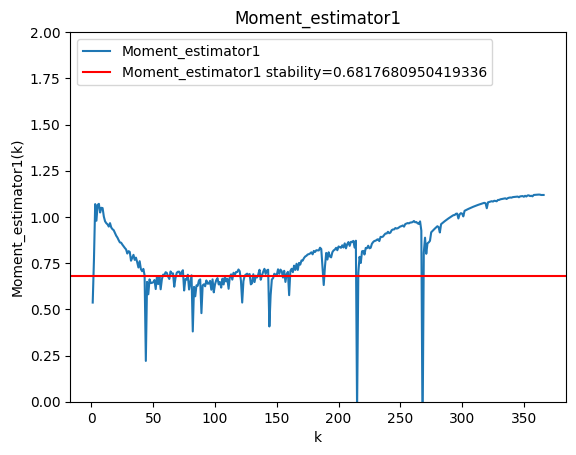

0.4562135367136806


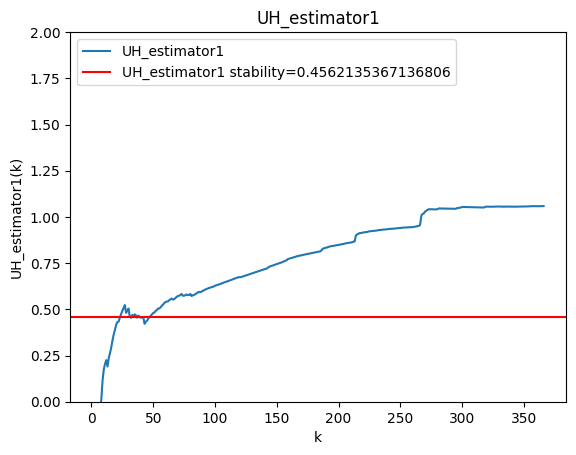

0.2819618977569698


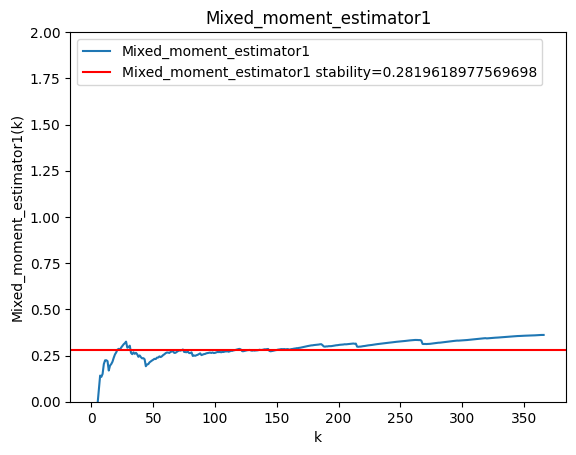

In [33]:
#interval = slice(200, 500)
plot_est(GammaH, label='Hill_estimator1')
plot_est(REst, label='Ratio_estimator1')
plot_est(GammaM_data, label='Moment_estimator1')
plot_est(GammaUH, label='UH_estimator1')
#plot_est(GammaP, interval=slice(100, 300), label='Pickands_estimator')
plot_est(num_gamma, label='Mixed_moment_estimator1')

<span style="color:orange">
    
## Проверка стационарности ##
Подбор последовательности

In [36]:
df_pr = pd.DataFrame(list(pr.items()), columns=['Node', 'PageRank'])
print(df_pr)

      Node  PageRank
0      563  0.001464
1      674  0.000190
2      571  0.000229
3      667  0.000278
4      822  0.000084
...    ...       ...
1894  1383  0.000090
1895  1385  0.000086
1896   810  0.000130
1897  1381  0.000083
1898  1382  0.000863

[1899 rows x 2 columns]


In [37]:
Time_start = int(data['Time_start'].min())
Time_stop = int(data['Time_start'].max())
step = (Time_stop - Time_start) / 90
time_list = []
num_nodes = []
time_num = []

j = 0
for i in range(15, 60):
    time_list.append(Time_start + i * step)
    time_num.append(j)
    j += 1
#    num_nodes.append(((data[data['Time_start'] < Time_start + i * step])['Source'].unique()).size)
    

print(Time_start)
print(Time_stop)
print(time_list)
#print(num_nodes)

1080090740
1098769942
[1083203940.3333333, 1083411487.0222223, 1083619033.711111, 1083826580.4, 1084034127.088889, 1084241673.7777777, 1084449220.4666667, 1084656767.1555555, 1084864313.8444445, 1085071860.5333333, 1085279407.2222223, 1085486953.911111, 1085694500.6, 1085902047.288889, 1086109593.9777777, 1086317140.6666667, 1086524687.3555555, 1086732234.0444446, 1086939780.7333333, 1087147327.4222221, 1087354874.1111112, 1087562420.8, 1087769967.488889, 1087977514.1777778, 1088185060.8666666, 1088392607.5555556, 1088600154.2444444, 1088807700.9333334, 1089015247.6222222, 1089222794.3111112, 1089430341.0, 1089637887.6888888, 1089845434.3777778, 1090052981.0666666, 1090260527.7555556, 1090468074.4444444, 1090675621.1333334, 1090883167.8222222, 1091090714.511111, 1091298261.2, 1091505807.8888888, 1091713354.5777779, 1091920901.2666667, 1092128447.9555554, 1092335994.6444445]


In [38]:
list_time_mean, list_time_std, num_nodes = pm.value_index_time(data, list(data['Source'].unique()), time_list)

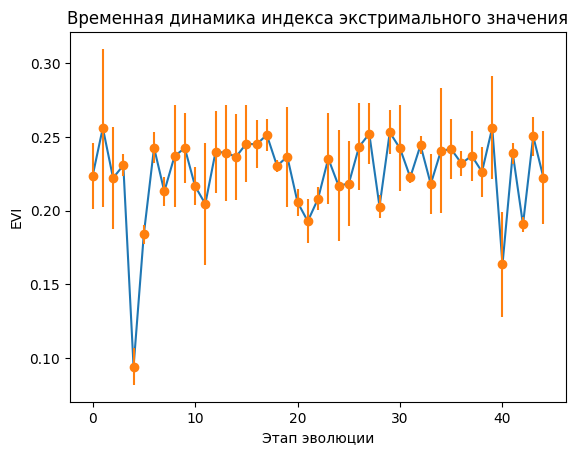

In [42]:
#plt.plot(time_list[:-1], list_val)
plt.plot(time_num, list_time_mean)
plt.errorbar(time_num, list_time_mean, yerr=list_time_std, fmt="o")
plt.xlabel('Этап эволюции') #Подпись для оси х
plt.ylabel('EVI') #Подпись для оси y
plt.title('Временная динамика индекса экстримального значения') #Название
plt.savefig(my_path + "/Text" + '/Imagines' + '/tail_time')
plt.show()

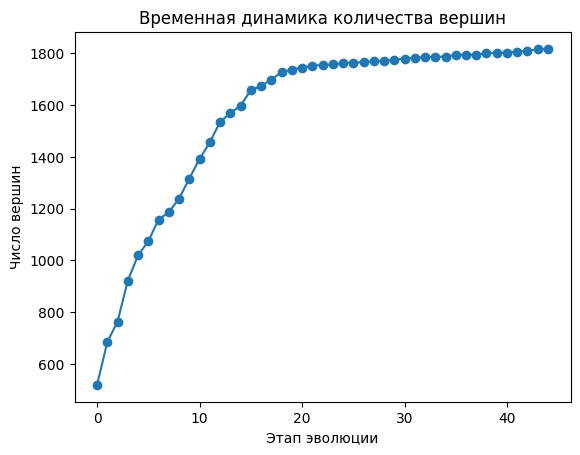

In [43]:
plt.plot(time_num, num_nodes, 'o-')
plt.xlabel('Этап эволюции') #Подпись для оси х
plt.ylabel('Число вершин') #Подпись для оси y
#plt.yscale('log')
y = np.arange(0, 1500)
plt.title('Временная динамика количества вершин') #Название
plt.savefig(my_path + "/Text" + '/Imagines' + '/num_nodes')
plt.show()

In [46]:
print(pm.test_tail_index(X))

(0    0.0
1    0.2
2    0.4
3    0.6
4    0.8
5    1.0
dtype: float64, 0    0.000000
1    0.251269
2    0.452219
3    0.598566
4    0.749125
5    0.982680
dtype: float64)


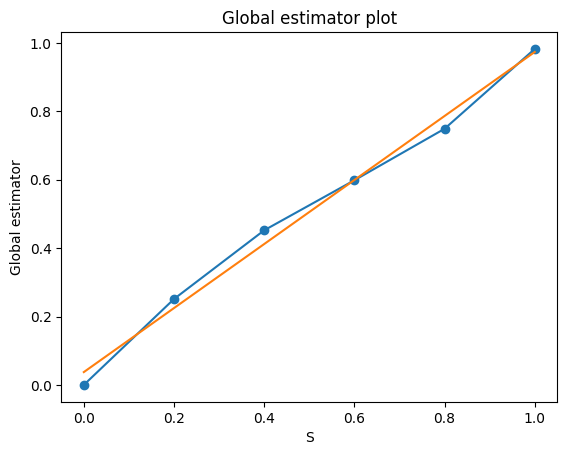

In [47]:
list_step, list_tt = pm.test_tail_index(X)
plt.plot(list_step, list_tt, 'o-')
z = np.polyfit(list_step, list_tt, 1)
p = np.poly1d(z)
plt.plot (list_step, p(list_step))
plt.xlabel('S') #Подпись для оси х
plt.ylabel('Global estimator') #Подпись для оси y
plt.title('Global estimator plot') #Название
plt.savefig(my_path + "/Text" + '/Imagines' + '/tail_time')
plt.show()